In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

transactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Transactions.csv', sep=";")

customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customers.csv', sep=";")

products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/products.csv', sep=";")



<ipython-input-7-2b77e8dacd8d>:6: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Transactions.csv', sep=";")


Lecture de Customer

In [8]:
display(customers.head())

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [9]:
customers.describe(include='all')

,client_id,sex,birth
count,8621,8621,8621.000000
unique,8621,2,NaN
top,c_84,f,NaN
freq,1,4490,NaN
mean,NaN,NaN,1978.275606
std,NaN,NaN,16.917958
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


Lecture de transactions

In [10]:
transactions.dropna(inplace=True)
display(transactions.head())

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [11]:
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,687419,345505,8600
top,1_369,2021-10-03 11:54:55.781188,s_118668,c_1609
freq,2340,2,14,25586


Lecture de products

In [12]:
display(products.head())

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [13]:
print(products['categ'].unique())

[0 1 2]


In [14]:
products.describe(include='all')

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_1920,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


Jointure des 3 fichiers

In [15]:
#Jointure des 3 fichiers
# Jointure gauche depuis transactions
df = pd.merge(transactions, customers, on='client_id', how='left')
df = pd.merge(df, products, on='id_prod', how='left')
df = df.drop(columns=['session_id'])
display(df.head())



,id_prod,date,client_id,sex,birth,price,categ
0,0_1259,2021-03-01 00:01:07.843138,c_329,f,1967,11.99,0
1,0_1390,2021-03-01 00:02:26.047414,c_664,m,1960,19.37,0
2,0_1352,2021-03-01 00:02:38.311413,c_580,m,1988,4.50,0
3,0_1458,2021-03-01 00:04:54.559692,c_7912,f,1989,6.55,0
4,0_1358,2021-03-01 00:05:18.801198,c_2033,f,1956,16.49,0


Chiffre d'affaire avec la moyenne mobile sur 30 jours

In [16]:
# Groupement par jour en faisant une somme par le prix
df_jour = df.groupby(pd.to_datetime(df['date']).dt.date)['price'].sum().reset_index()
display(df_jour.head())

# Changement de nom "price" en "CA"
df_jour = df_jour.rename(columns={'price':'CA'})

# Création de la moyenne mobile sur 30 jours
df_jour['CA_moy_mobile'] = df_jour['CA'].rolling(window=30).mean().round(2)
display(df_jour.head(10))

,date,price
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37


,date,CA,CA_moy_mobile
0,2021-03-01,16565.22,NaN
1,2021-03-02,15486.45,NaN
2,2021-03-03,15198.69,NaN
3,2021-03-04,15196.07,NaN
4,2021-03-05,17471.37,NaN
5,2021-03-06,15785.28,NaN
6,2021-03-07,14760.20,NaN
7,2021-03-08,15679.53,NaN
8,2021-03-09,15710.51,NaN
9,2021-03-10,15496.87,NaN


Text(0.5, 1.0, 'CA et Moyenne mobile')

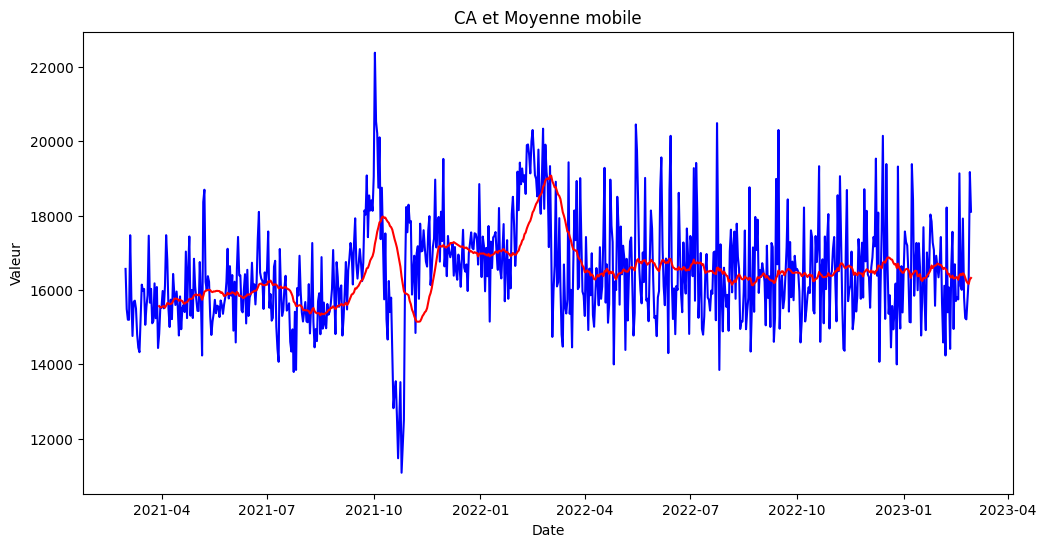

In [17]:
# Création d'un graphique affichant le CA et le CA avec moyenne mobile sur 30 jours
plt.figure(figsize=(12, 6))

plt.plot(df_jour['date'], df_jour['CA'], label='CA', color='blue')


plt.plot(df_jour['date'], df_jour['CA_moy_mobile'], label='Moyenne mobile (30 jours)', color='red')


plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('CA et Moyenne mobile')

In [ ]:
# La moyenne mobile fait apparaitre clairement une stagnation de notre CA.

Chiffre d'affaires par catégorie

,price
categ,
0,4419730.97
1,4827657.11
2,2780275.02


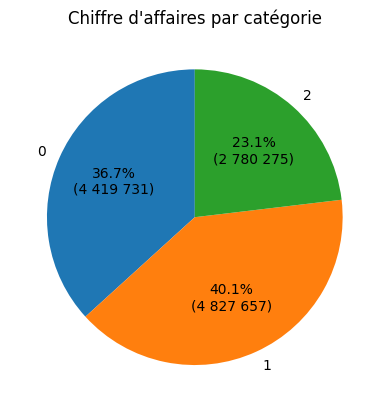

In [18]:
#Groupement du CA par catégorie
df_categ = df.groupby('categ')['price'].sum()
display(df_categ)

#Création d'un camembert
plt.pie(
    df_categ,
    labels=df_categ.index,
    autopct=lambda pct: "{:.1f}%\n({:s})".format(
        pct,
        "{:,.0f}".format(pct / 100. * df_categ.sum()).replace(",", " ")
    ),
    startangle=90
)
plt.title("Chiffre d'affaires par catégorie")
plt.show()

Nbre de client par mois

In [19]:
# On groupe par mois (MM/YYYY) en comptant le nombre unique de client par mois.
df_mois = df.groupby(pd.to_datetime(df['date']).dt.strftime('%Y-%m'))['client_id'].nunique().reset_index()
# J'enlève la donnée de février qui ne représente pas un mois plein
df_mois = df_mois.loc[(df_mois['client_id']>5600)]


display(df_mois)



,date,client_id
0,2021-03,5676
1,2021-04,5674
2,2021-05,5644
3,2021-06,5659
4,2021-07,5672
5,2021-08,5642
6,2021-09,5693
7,2021-10,6190
8,2021-11,5875
9,2021-12,5867


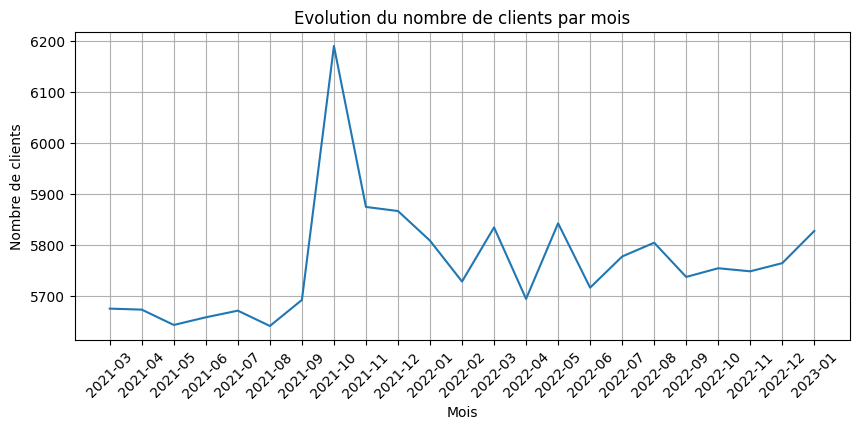

In [20]:
#Création d'un graphique en ligne
fig = plt.figure(figsize=(10, 4))
plt.plot(df_mois['date'], df_mois['client_id'])
plt.xlabel('Mois')
plt.ylabel('Nombre de clients')
plt.title('Evolution du nombre de clients par mois')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Nbre de transactions

In [21]:
print("Le nombre de transactions est de {}".format(df.shape[0]))

Le nombre de transactions est de 687534


nbre de produits vendus

In [22]:
print("Le nombre de produits vendus est de {}".format(df['id_prod'].nunique()))

Le nombre de produits vendus est de 3265


Les tops produits vendus

,id_prod,categ,CA
0,2_159,2,94893.50
1,2_135,2,69334.95
2,2_112,2,65407.76
3,2_102,2,60736.78
4,2_209,2,56971.86
5,1_395,1,56617.47
6,1_369,1,56136.60
7,2_110,2,53846.25
8,1_383,1,53834.43
9,1_414,1,53522.18


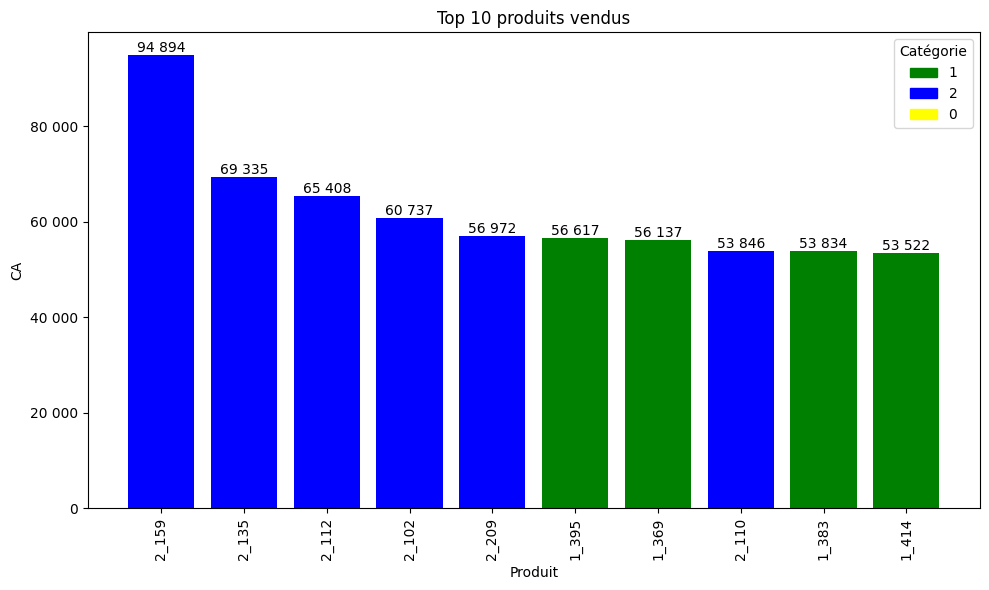

In [23]:
# Création de df_produits qui est un groupement par produit en faisant une somme sur les prix pour connaitre le CA par produit
# trie par ordre croissant
df_produits = df.groupby(['id_prod','categ'])['price'].sum().sort_values(ascending=False).reset_index()
df_produits = df_produits.rename(columns={'price':'CA'})
display(df_produits.head(10))

from matplotlib.patches import Patch

# Top 10 produits
top10 = df_produits[:10]

# Définir les couleurs pour chaque catégorie
couleur_map = {
    '1': 'green',
    '2': 'blue',
    '0': 'yellow'
}

bar_colors = [couleur_map.get(str(cat),'gray') for cat in top10['categ']]

from matplotlib.ticker import FuncFormatter

# Création d'une définition pour appliquer le formateur de milliers
def format_milliers(x, pos):
    return f"{x:,.0f}".replace(",", " ")

# Appliquer le formateur à l'axe Y
formatter = FuncFormatter(format_milliers)

plt.figure(figsize=(10, 6))
plt.bar(df_produits['id_prod'][:10], df_produits['CA'][:10], color=bar_colors)
plt.xticks(rotation=90)

# Ajouter les valeurs au-dessus des barres
for i, v in enumerate(df_produits['CA'][:10]):
    plt.text(i, v, f"{v:,.0f}".replace(",", " "), ha='center', va='bottom')

# Appliquer le formateur à l'axe Y
plt.gca().yaxis.set_major_formatter(formatter)

legend_handles = [Patch(color=couleur_map[cat], label=cat) for cat in couleur_map]
plt.legend(handles=legend_handles, title="Catégorie")

plt.xlabel('Produit')
plt.ylabel('CA')
plt.title('Top 10 produits vendus')

plt.tight_layout()
plt.show()

Les tops clients

,client_id,birth,CA
4,c_1570,1979,5285.82
5,c_3263,1985,5276.87
6,c_2140,1977,5260.18
7,c_2899,1994,5214.05
8,c_7319,1974,5155.77
9,c_7959,1974,5135.75
10,c_1422,1980,5131.36
11,c_7421,1978,5097.18
12,c_8026,1978,5082.58


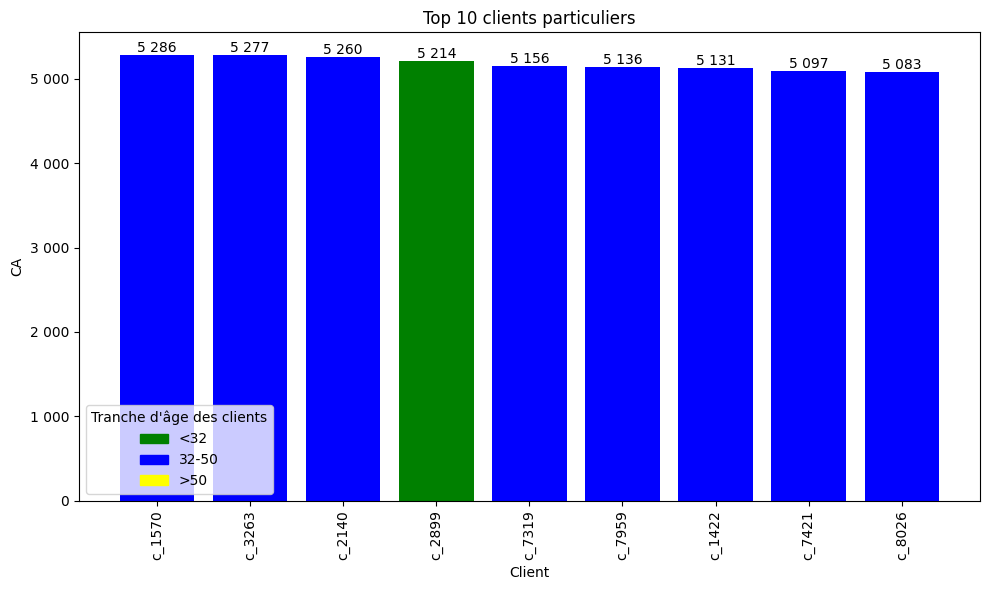

In [24]:
# Group by des clients en calculant le CA par client et en affichant le top 10
# et en enlevant les clients pro
df_top_client= df.groupby(['client_id','birth'])['price'].sum().sort_values(ascending=False).reset_index()
df_top_client = df_top_client.rename(columns={'price':'CA'})
df_top_client = df_top_client.iloc[4:13]
display(df_top_client.head(10))

df_top_client['age'] = 2023 - df_top_client['birth']
df_top_client['trancheage'] = pd.cut(df_top_client['age'], bins=[0, 31, 50, 100], labels=["<32", "32-50", ">50"])

# Top 10 clients
top10c = df_top_client[:10]

# Définir les couleurs manuellement pour chaque catégorie
couleur_map = {
    '<32': 'green',
    '32-50': 'blue',
    '>50': 'yellow'
}

bar_colors = [couleur_map.get(str(cat),'gray') for cat in top10c['trancheage']]

plt.figure(figsize=(10, 6))
plt.bar(df_top_client['client_id'][:10], df_top_client['CA'][:10], color=bar_colors)
plt.xticks(rotation=90)

# Ajouter les valeurs au-dessus des barres
for i, v in enumerate(df_top_client['CA'][:10]):
    plt.text(i, v, f"{v:,.0f}".replace(",", " "), ha='center', va='bottom')

# Appliquer le formateur à l'axe Y
plt.gca().yaxis.set_major_formatter(formatter)

legend_handles = [Patch(color=couleur_map[cat], label=cat) for cat in couleur_map]
plt.legend(handles=legend_handles, title="Tranche d'âge des clients")

plt.xlabel('Client')
plt.ylabel('CA')
plt.title('Top 10 clients particuliers')

plt.tight_layout()
plt.show()


Les flops

In [25]:
df_produits = df_produits.sort_values(by='CA', ascending=True)

display(df_produits.head(10))

,id_prod,categ,CA
3264,0_1539,0,0.99
3263,0_1284,0,1.38
3262,0_1653,0,1.98
3259,0_541,0,1.99
3260,0_1601,0,1.99
3261,0_807,0,1.99
3258,0_1728,0,2.27
3257,0_1498,0,2.48
3256,0_898,0,2.54
3255,0_1840,0,2.56


In [26]:
display(df.head())

,id_prod,date,client_id,sex,birth,price,categ
0,0_1259,2021-03-01 00:01:07.843138,c_329,f,1967,11.99,0
1,0_1390,2021-03-01 00:02:26.047414,c_664,m,1960,19.37,0
2,0_1352,2021-03-01 00:02:38.311413,c_580,m,1988,4.50,0
3,0_1458,2021-03-01 00:04:54.559692,c_7912,f,1989,6.55,0
4,0_1358,2021-03-01 00:05:18.801198,c_2033,f,1956,16.49,0


In [27]:
df_client = df.groupby('client_id')['price'].sum().reset_index()
df_client = df_client.sort_values(by='price', ascending=True)
df_client = df_client.rename(columns={'price':'CA'})
display(df_client.head(10))

,client_id,CA
8151,c_8351,6.31
7918,c_8140,8.30
7889,c_8114,9.98
4044,c_4648,11.20
3855,c_4478,13.36
5589,c_6040,15.72
5453,c_5919,15.98
5354,c_5829,16.07
7798,c_8032,17.64
4408,c_4976,17.89


La répartition par catégorie ???

Répartition du CA pour les clients BtoB

In [28]:
#Quels sont les clients BtoB ?
# Doit on considérer le top 4 client comme des clients B2B ?
## J'ai essayé par autre lettre que c pour les clients, sans f ou m pour sex, je ne vois pas comment dénicher des clients B2B
df_B2B = df.loc[~((df['sex']== 'f')|(df['sex']== 'm'))]
# display(df_B2B.head()) ne donne pas d'indication sur les B2B

# Approche par les Outliers
# Création du Z score
from scipy.stats import zscore

df_client['zscore-CA'] = zscore(df_client['CA'])
df_client['Type_client'] = "Particulier"
for i in df_client.index:  # Itérer sur les index du DataFrame
  if df_client.loc[i, 'zscore-CA'] > 3:  # Si Z Score > 3
    df_client.loc[i, 'Type_client'] = "B2B"  # Remplace type client par B2B
  else:
    df_client.loc[i, 'Type_client'] = "Particulier" # Sinon met Particulier

display(df_client.head())

# J'ai voulu ensuite vérifier s'il fallait faire une deuxième vague de tri avec un nouveau Z score. Je n'ai pas trouvé de de gros écarts, et la fiche d'auto-évaluation nous indiquait 4 clients B2B à isoler.
df_particulier = df_client.loc[df_client['Type_client'] == 'Particulier']
df_B2B = df_client.loc[df_client['Type_client'] == 'B2B']

df_particulier['zscorepart'] = zscore(df_particulier['CA'])

display(df_particulier.head())

B2B = []
for i in df_B2B.index:
  if df_B2B.loc[i, 'zscore-CA'] > 3:
    B2B.append(df_B2B.loc[i, 'client_id'])

print(B2B)

df['sex'] = np.where(df['client_id'].isin(B2B), 'B2B', df['sex'])


,client_id,CA,zscore-CA,Type_client
8151,c_8351,6.31,-0.267614,Particulier
7918,c_8140,8.30,-0.267232,Particulier
7889,c_8114,9.98,-0.266909,Particulier
4044,c_4648,11.20,-0.266674,Particulier
3855,c_4478,13.36,-0.266259,Particulier


<ipython-input-28-e0490c751998>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_particulier['zscorepart'] = zscore(df_particulier['CA'])


,client_id,CA,zscore-CA,Type_client,zscorepart
8151,c_8351,6.31,-0.267614,Particulier,-1.346100
7918,c_8140,8.30,-0.267232,Particulier,-1.344023
7889,c_8114,9.98,-0.266909,Particulier,-1.342270
4044,c_4648,11.20,-0.266674,Particulier,-1.340997
3855,c_4478,13.36,-0.266259,Particulier,-1.338744


['c_3454', 'c_6714', 'c_4958', 'c_1609']


In [29]:
df_B2B = df.loc[df['sex']=='B2B']
display(df_B2B.head())

,id_prod,date,client_id,sex,birth,price,categ
6,0_1304,2021-03-01 00:07:04.371179,c_1609,B2B,1980,5.86,0
13,0_1159,2021-03-01 00:11:57.832228,c_1609,B2B,1980,7.99,0
50,0_1431,2021-03-01 01:08:49.803921,c_3454,B2B,1969,10.99,0
78,0_1425,2021-03-01 01:56:41.944044,c_1609,B2B,1980,12.99,0
88,0_1469,2021-03-01 02:12:21.294004,c_1609,B2B,1980,14.99,0


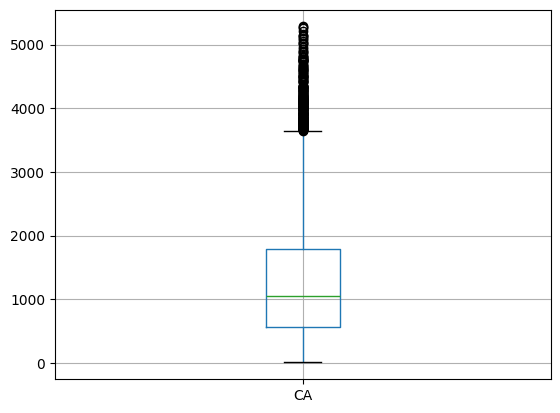

In [30]:
df_particulier.boxplot(column='CA')
plt.show()
# Création d'une boite à moustache. Certaines données dépassent l'interquartile. Cependant, difficile d'établir une limite 'particulier' - 'nouveau clients b2b'.
# Je garde le postulat que les 4 premiers outiliers sont des clients b2b et tous les autres des clients particuliers.

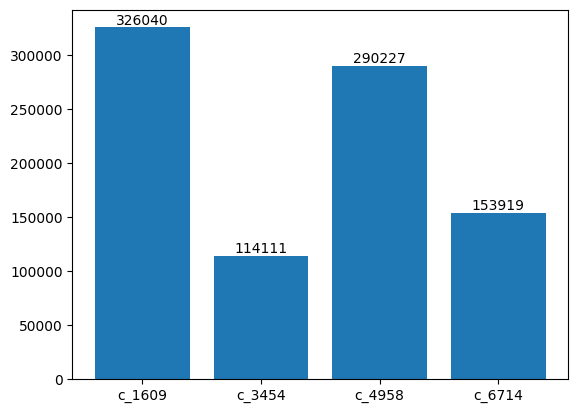

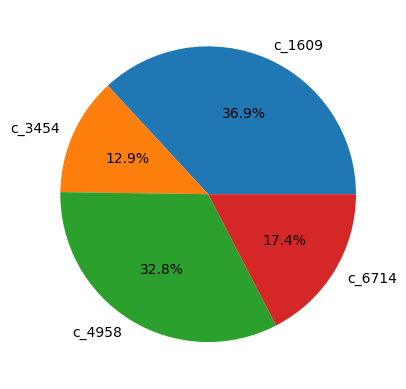

,Type_client,CA
0,B2B,884296.09
1,Particulier,11143367.01


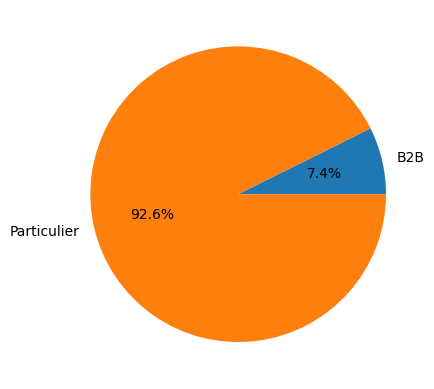

In [31]:
# Répartition du CA pour les clients B2B
df_B2B = df_B2B.groupby('client_id')['price'].sum().reset_index()
df_B2B = df_B2B.rename(columns={'price':'CA'})

fig1 = plt.bar(x=df_B2B['client_id'], height=df_B2B['CA'])
for i, v in enumerate(df_B2B['CA']):
  plt.text(i, v, str(round(v)), ha='center', va='bottom')
plt.show()

# Graphique représentant la répartition du CA entre les 4 clients B2B
fig2 = plt.pie(df_B2B['CA'], labels=df_B2B['client_id'], autopct='%1.1f%%')
plt.show()

# Graphique représentant la répartition du CA entre les clients B2B et les clients particuliers
df_repartition = df_client.groupby('Type_client')['CA'].sum().reset_index()
display(df_repartition)
fig3 = plt.pie(df_repartition['CA'], labels=df_repartition['Type_client'], autopct='%1.1f%%')
plt.show()

Courbe de Lorenz

On va faire la courbe de lorenz pour les ventes de pour montrer la disparité des achats au sein de nos clients (fait à la fin)


Autre info ou graphiques qui apporteraient de l'information pertinentes

Lien entre le genre d'un client et les catégories de livres achetés (Faire un Khi 2)

In [32]:
# On garde les clients particuliers
df_particulier = df.loc[(df['sex']=='m')|(df['sex']=='f')]


In [33]:
# On calcule le CA en fonction des catégories et du sexe
df_genre_categ = df_particulier.groupby(['sex', 'categ'])['price'].sum().reset_index()
df_genre_categ = df_genre_categ.rename(columns={'price':'CA'})
display(df_genre_categ.head(10))

,sex,categ,CA
0,f,0,2132758.48
1,f,1,2376011.35
2,f,2,1288155.25
3,m,0,1986442.21
4,m,1,2144090.51
5,m,2,1215909.21


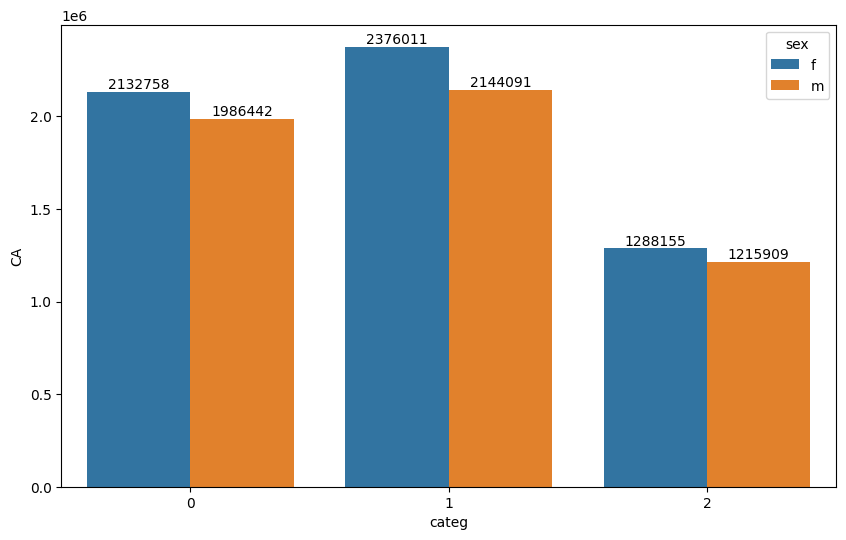

In [34]:
# Création du graphique représentant le CA en fonction des catégories et du sexe

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='categ', y='CA', hue='sex', data=df_genre_categ)
for container in ax.containers:
    # Itérer sur chaque barre du container
    for i, bar in enumerate(container.patches):
        # Obtenir la hauteur de la barre (CA)
        v = bar.get_height()
        # Afficher le CA au-dessus de la barre
        ax.text(bar.get_x() + bar.get_width() / 2, v, str(round(v)), ha='center', va='bottom')

plt.show()



,sex,categ,Nombre de transaction
0,f,0,200793
1,f,1,115721
2,f,2,16980
3,m,0,186488
4,m,1,104884
5,m,2,15868


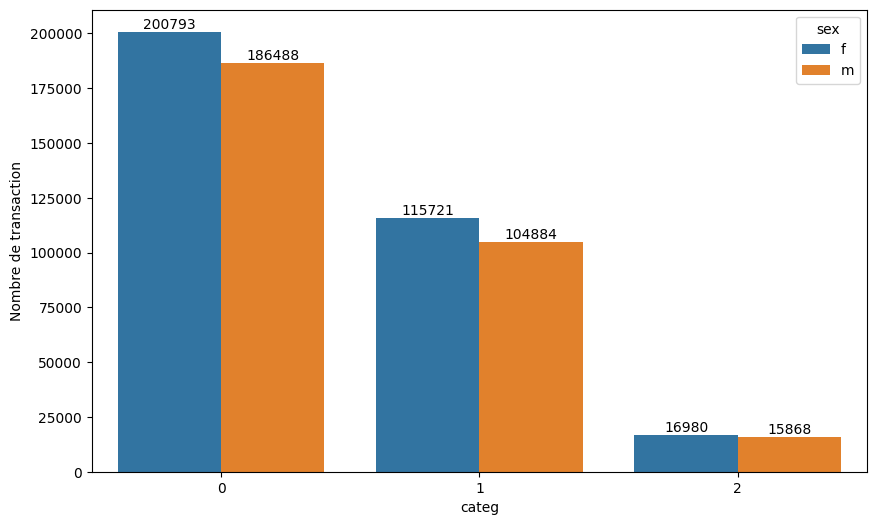

In [35]:
df_genre_categ_freq = df_particulier.groupby(['sex', 'categ'])['price'].count().reset_index()
df_genre_categ_freq = df_genre_categ_freq.rename(columns={'price':'Nombre de transaction'})
display(df_genre_categ_freq.head(10))

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='categ', y='Nombre de transaction', hue='sex', data=df_genre_categ_freq)
for container in ax.containers:
    # Itérer sur chaque barre du container
    for i, bar in enumerate(container.patches):
        # Obtenir la hauteur de la barre (CA)
        v = bar.get_height()
        # Afficher le CA au-dessus de la barre
        ax.text(bar.get_x() + bar.get_width() / 2, v, str(round(v)), ha='center', va='bottom')

plt.show()

In [36]:
# Réalisation du test du Chi 2 pour observer le lien entre sexe et catégorie.
# En effet, il s'agit de deux variables qualitatives avec un modèle 2x3 donc nous ne pouvons pas faire un test de fischer

from scipy.stats import chi2_contingency

# Créer une table de contingence
contingency_table = pd.crosstab(df_particulier['sex'], df_particulier['categ'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Statistique Chi 2:", chi2_stat)
print("p-value:", p_value)
print(expected)

Statistique Chi 2: 22.66856665178056
p-value: 1.1955928116587024e-05
[[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]


Du coup, on est sur à plus de 99% que les deux variables ne sont pas indépendantes.

Lien entre l'âge des clients et le montant total des achats

,client_id,Montant_total_des_achats,birth,Age
0,c_1,629.02,1955,68
1,c_10,1353.60,1956,67
2,c_100,254.85,1992,31
3,c_1000,2291.88,1966,57
4,c_1001,1823.85,1982,41


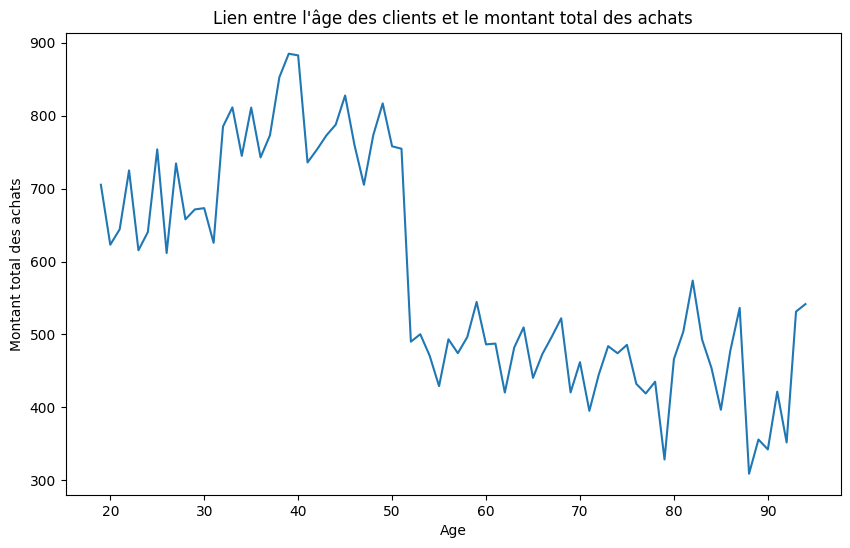

In [37]:
df_client_part = df_particulier.groupby('client_id').agg({'price':'sum','birth':'first'}).reset_index()
df_client_part = df_client_part.rename(columns={'price':'Montant_total_des_achats'})
df_client_part['Age'] = 2023 - df_client_part['birth']

display(df_client_part.head())

df_client_part_plt = df_client_part.groupby('Age')['Montant_total_des_achats'].mean()/2
plt.figure(figsize=(10, 6))
df_client_part_plt.plot()
plt.xlabel('Age')
plt.ylabel('Montant total des achats')
plt.title('Lien entre l\'âge des clients et le montant total des achats')
plt.show()


In [38]:
df_client_part_plt = df_client_part_plt.sort_values(ascending=False)
display(df_client_part_plt.head(25))
df_client_part['tranche_age'] = pd.cut(df_client_part['Age'], bins=[0, 31, 50, 100], labels=["<32", "32-50", ">50"])
df_client_part_moy = df_client_part.groupby('tranche_age')['Montant_total_des_achats'].mean().reset_index()
display(df_client_part_moy.head())

,Montant_total_des_achats
Age,
39,884.925839
40,882.636235
38,852.625870
45,827.643065
49,816.808313
33,811.354899
35,811.059952
44,787.714302
32,785.087138


<ipython-input-38-c74f3516dd70>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_client_part_moy = df_client_part.groupby('tranche_age')['Montant_total_des_achats'].mean().reset_index()


,tranche_age,Montant_total_des_achats
0,<32,1343.632983
1,32-50,1574.118055
2,>50,973.515151


Commençons par tester la normalité de nos deux variables âge et montant total des achats

In [39]:
from scipy.stats import shapiro

Age = df_client_part['Age'].dropna()
Montant_total_des_achats = df_client_part['Montant_total_des_achats'].dropna()

stat, p = shapiro(Age)
print('Test de Shapiro-Wilk pour la variable Age:')
print('Statistique du test:', stat)
print('p-value:', p)

stat, p = shapiro(Montant_total_des_achats)
print('\nTest de Shapiro-Wilk pour la variable Montant total des achats:')
print('Statistique du test:', stat)
print('p-value:', p)

Test de Shapiro-Wilk pour la variable Age:
Statistique du test: 0.9697306402580121
p-value: 4.615340399594849e-39

Test de Shapiro-Wilk pour la variable Montant total des achats:
Statistique du test: 0.9042872733458418
p-value: 1.4824486626352822e-58


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.
  res = hypotest_fun_out(*samples, **kwds)


In [40]:
# Nous pouvons rejeter l'hypothèse alternative et considérer la normalité pour nos deux variables (p inférieur à 0,05 mais grand jeu de donnée ce qui rend la valeur de p peu pertinente.
#Je me fis à valeur du statistique de test proche de 1 dans les deux cas).
# S'agissant de 2 variables quantitatives, avec des données suivant une distribution normale et indépendantes
# Nous pouvons donc réaliser un test de pearson.

from scipy.stats import pearsonr

stat, p = pearsonr(Age, Montant_total_des_achats)
print('Test de Pearson:')
print('Statistique du test:', stat.round(3))
print('p-value:', p.round(3))

Test de Pearson:
Statistique du test: -0.188
p-value: 0.0


In [41]:
# Il ne semble pas y avoir de correlation, mais on voit sur le graphique que c'est non linéaire.
# On ne peut non plus faire un test de spearman (non monotone)

# Je vais donc grouper par tranche (0-32, 32-50 et 51 et plus) et vérifier si on peut faire un test ANOVA.

df_client_part['AgeGroup'] = pd.cut(df_client_part['Age'], bins=[0, 31, 50, 100], labels=["<32", "32-50", ">50"])

# Je créé ensuite chaque groupe, et j'irai ensuite tester la normalité et la variance
df_031 = df_client_part.loc[df_client_part['AgeGroup'] == '<32']
df_32_50 = df_client_part.loc[df_client_part['AgeGroup'] == '32-50']
df_51 = df_client_part.loc[df_client_part['AgeGroup'] == '>50']

# Test de la normalité des 3 groupes
stat, p = shapiro(df_031['Montant_total_des_achats'])
print('Test de Shapiro-Wilk pour la variable Age <32:')
print('Statistique du test:', stat)
print('p-value:', p)

stat, p = shapiro(df_32_50['Montant_total_des_achats'])
print('\nTest de Shapiro-Wilk pour la variable Age 32-50:')
print('Statistique du test:', stat)
print('p-value:', p)

stat, p = shapiro(df_51['Montant_total_des_achats'])
print('\nTest de Shapiro-Wilk pour la variable Age >50:')
print('Statistique du test:', stat)
print('p-value:', p)


Test de Shapiro-Wilk pour la variable Age <32:
Statistique du test: 0.9285518190610456
p-value: 1.3778223494053106e-31

Test de Shapiro-Wilk pour la variable Age 32-50:
Statistique du test: 0.9189497257224045
p-value: 1.5252172772055304e-38

Test de Shapiro-Wilk pour la variable Age >50:
Statistique du test: 0.9149592066876293
p-value: 1.1614607310505244e-38


In [42]:
# J'observe des coefficients de correlation favorables à l'hypothèse de normalité mais une p-value < 0,05 qui m'incite a rejetter la normalité.
# Je vais compter le nombre d'observation pour me faire un avis sur la pertinence de la p-value et observer la variance.

print(df_031.shape[0])
print(df_32_50.shape[0])
print(df_51.shape[0])

print(np.var(df_031['Montant_total_des_achats']))
print(np.var(df_32_50['Montant_total_des_achats']))
print(np.var(df_51['Montant_total_des_achats']))

2266
3224
3106
860716.8526273763
1189214.4826724308
493530.0967773919


In [44]:
# Vu le nombre élevé d'observation pour chaque groupe, on pourrait accepter une p-value faible.
# Cependant nous avons des écarts importants dans nos variances et les tailles d'échantillons ne sont pas sensiblement égales.

# Donc nous ne pouvons pas réaliser de test Anova.



In [45]:
# J'ai approfondi et poursuivi sur un test de Levene pour conforter le rejet de l'ANOVA et nous avons la même conclusion.
from scipy.stats import levene

stat, p = levene(df_031['Montant_total_des_achats'], df_32_50['Montant_total_des_achats'], df_51['Montant_total_des_achats'])
print('Test de Levene:')
print('Statistique du test:', stat)
print('p-value:', p)

Test de Levene:
Statistique du test: 199.83388921007676
p-value: 1.4826265598709496e-85


In [46]:
# Je vais tenter un test Kruskal_Wallis (non paramétrique)
from scipy.stats import kruskal

stat, p = kruskal(df_031['Montant_total_des_achats'], df_32_50['Montant_total_des_achats'], df_51['Montant_total_des_achats'])
print('Test de Kruskal-Wallis:')
print('Statistique du test:', stat)
print('p-value:', p)


Test de Kruskal-Wallis:
Statistique du test: 561.1451306002442
p-value: 1.4089095623415468e-122


In [47]:
# La p-value est <0,05 donc on peut conclure à une différence significative entre les groupes

Lien entre l'âge des clients et la fréquence d'achat

In [48]:
# Calcul du nombre de transaction par an par âge
df_freq_age = df_particulier.groupby('client_id').agg({'date':'count', 'birth':'first'}).reset_index()
df_freq_age = df_freq_age.rename(columns={'date':'Nombre de transactions', 'birth':'Age'})
df_freq_age['Age'] = 2023 - df_freq_age['Age']
df_freq_age = df_freq_age.groupby('Age')['Nombre de transactions'].mean().reset_index()
df_freq_age['Nombre de transactions'] = (df_freq_age['Nombre de transactions']/2).round(2)
display(df_freq_age.head())

,Age,Nombre de transactions
0,19,17.73
1,20,15.49
2,21,16.24
3,22,17.51
4,23,16.65


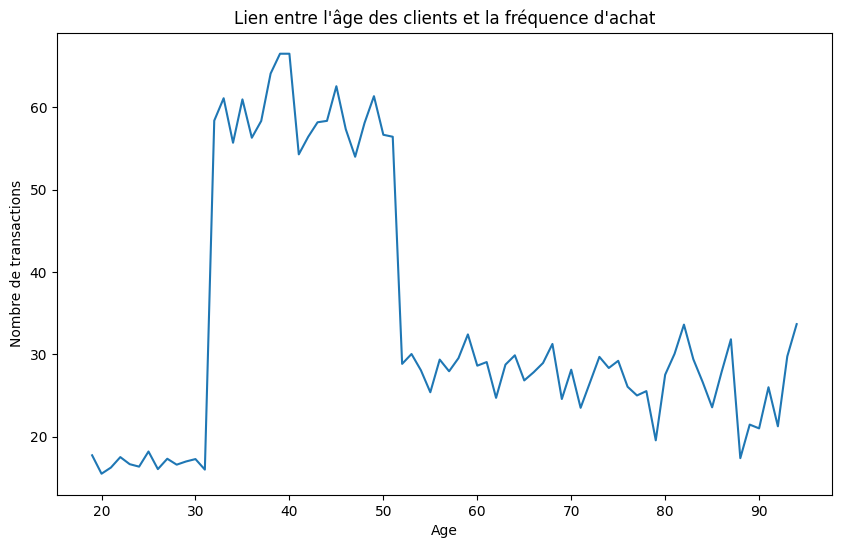

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(df_freq_age['Age'], df_freq_age['Nombre de transactions'])
plt.xlabel('Age')
plt.ylabel('Nombre de transactions')
plt.title('Lien entre l\'âge des clients et la fréquence d\'achat')
plt.show()

In [50]:
# On va tester la normalité de nos deux variables
Age = df_freq_age['Age'].dropna()
Nombre_de_transactions = df_freq_age['Nombre de transactions'].dropna()

stat, p = shapiro(Age)
print('Test de Shapiro-Wilk pour la variable Age:')
print('Statistique du test:', stat)
print('p-value:', p)

stat, p = shapiro(Nombre_de_transactions)
print('\nTest de Shapiro-Wilk pour la variable Nombre de transactions:')
print('Statistique du test:', stat)
print('p-value:', p)


Test de Shapiro-Wilk pour la variable Age:
Statistique du test: 0.9549230726696206
p-value: 0.008752885621051844

Test de Shapiro-Wilk pour la variable Nombre de transactions:
Statistique du test: 0.8213117508704321
p-value: 3.6232993875527545e-08


In [51]:
# Plutôt un rejet de H0 => Nombre de transactions a une statistique de test éloignée de 1 et p value très faible.

# On ferait un test de spearman (non paramétrique)

from scipy.stats import spearmanr

stat, p = spearmanr(Age, Nombre_de_transactions)
print('Test de Spearman:')
print('Statistique du test:', stat)
print('p-value:', p)

Test de Spearman:
Statistique du test: 0.005263229846422727
p-value: 0.964008765658111


In [52]:
# Test faible et p-Value > 0,05 : On ne rejette pas H0 : il n'y a pas de correlation monotone. (visible sur le graphique)

lien entre l'âge des clients et la taille du panier moyen

,birth,panier_moyen,Age
0,1929,16.088317,94
1,1930,17.862269,93
2,1931,16.561471,92
3,1932,16.215321,91
4,1933,16.303065,90


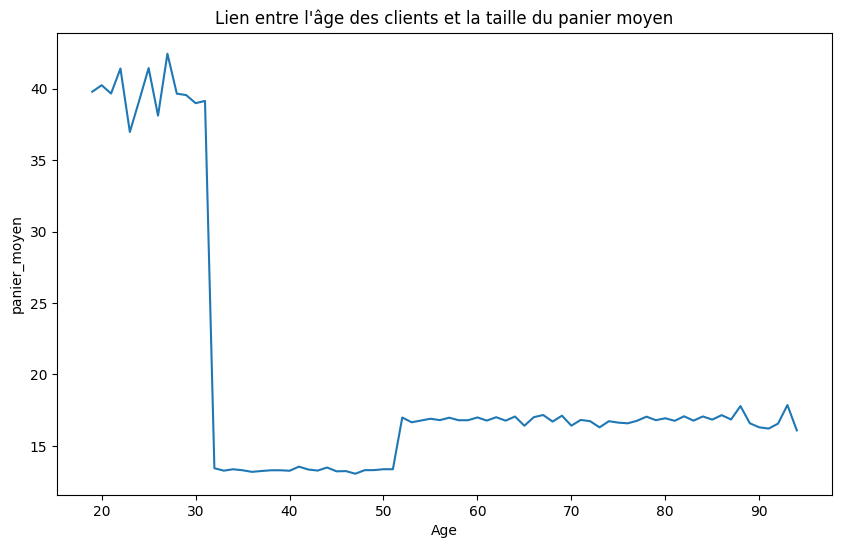

In [53]:
# Création d'un dataframe groupant les clients par le même âge et en faisant une moyenne de leur panier.

df_age_panier = df_particulier.groupby('birth')['price'].mean().reset_index()
df_age_panier = df_age_panier.rename(columns={'price':'panier_moyen'})
df_age_panier['Age'] = 2023 - df_age_panier['birth']
display(df_age_panier.head())

plt.figure(figsize=(10, 6))
plt.plot(df_age_panier['Age'], df_age_panier['panier_moyen'])
plt.xlabel('Age')
plt.ylabel('panier_moyen')
plt.title('Lien entre l\'âge des clients et la taille du panier moyen')
plt.show()

In [54]:
# On observe que les données sont non linéaires et non monotones et on ne peut donc pas réaliser de test de pearson ou spearman.

lien entre l'âge des clients et la catégorie des livres achetés

In [55]:
display(df_particulier.head())

,id_prod,date,client_id,sex,birth,price,categ
0,0_1259,2021-03-01 00:01:07.843138,c_329,f,1967,11.99,0
1,0_1390,2021-03-01 00:02:26.047414,c_664,m,1960,19.37,0
2,0_1352,2021-03-01 00:02:38.311413,c_580,m,1988,4.50,0
3,0_1458,2021-03-01 00:04:54.559692,c_7912,f,1989,6.55,0
4,0_1358,2021-03-01 00:05:18.801198,c_2033,f,1956,16.49,0


,client_id,categ,Montant_achat,birth,Nombre_transactions
0,c_1,0,360.15,1955,30
1,c_1,1,214.00,1955,12
2,c_1,2,54.87,1955,1
3,c_10,0,263.87,1956,20
4,c_10,1,809.77,1956,34


<ipython-input-56-fa9c467201cd>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_categ_fig = df_age_categ.groupby(['AgeGroup', 'categ']).agg({'Montant_achat':'mean','Nombre_transactions':'mean'}).reset_index()


,client_id,categ,Montant_achat,birth,Nombre_transactions,Age,AgeGroup
0,c_1,0,360.15,1955,30,68,>50
1,c_1,1,214.00,1955,12,68,>50
2,c_1,2,54.87,1955,1,68,>50
3,c_10,0,263.87,1956,20,67,>50
4,c_10,1,809.77,1956,34,67,>50


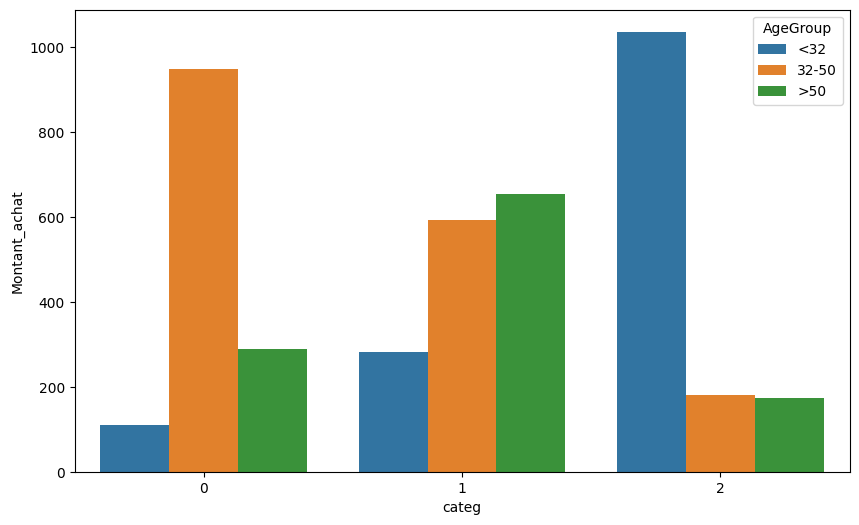

In [56]:
# Je groupe par somme des dépenses effectuées par client par catégorie sur les deux dernières années
df_age_categ = df_particulier.groupby(['client_id','categ']).agg({'price':'sum','birth':'first','date':'count'}).reset_index()
df_age_categ = df_age_categ.rename(columns={'price':'Montant_achat','date':'Nombre_transactions'})
display(df_age_categ.head())

# Je groupe par moyenne d'achat effectué sur les 2 dernières années
df_age_categ['Age'] = 2023 - df_age_categ['birth']
df_age_categ['AgeGroup'] = pd.cut(df_age_categ['Age'], bins=[0, 31, 50, 100], labels=["<32", "32-50", ">50"])

df_age_categ_fig = df_age_categ.groupby(['AgeGroup', 'categ']).agg({'Montant_achat':'mean','Nombre_transactions':'mean'}).reset_index()

display(df_age_categ.head())
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='categ', y='Montant_achat', hue='AgeGroup', data=df_age_categ_fig)
plt.show()

In [66]:
# Je vais vérifier si on peut réaliser un test paramétrique Anova à 2 facteurs (2 variables qualitatives, une variable quantitative).
df_particulier['Age']= 2023 - df_particulier['birth']
df_particulier['AgeGroup'] = pd.cut(df_particulier['Age'], bins=[0, 31, 50, 100], labels=["<32", "32-50", ">50"])

df_client = df_particulier.groupby(['client_id', 'categ']).agg({'price': 'sum','Age': 'first','AgeGroup': 'first'}).reset_index()
df_client = df_client.rename(columns={'price':'Montant_achat'})

# On filtre les données pour les 3 catégories
df_categ0 = df_client.loc[df_client['categ'] == 0]
df_categ1 = df_client.loc[df_client['categ'] == 1]
df_categ2 = df_client.loc[df_client['categ'] == 2]

# Puis on créé les 3 sous groupes d'âge pour chaque catégorie
df_categ0_31 = df_categ0.loc[df_categ0['AgeGroup'] == '<32']
df_categ0_3250 = df_categ0.loc[df_categ0['AgeGroup'] == '32-50']
df_categ0_51 = df_categ0.loc[df_categ0['AgeGroup'] == '>50']

df_categ1_31 = df_categ1.loc[df_categ1['AgeGroup'] == '<32']
df_categ1_3250 = df_categ1.loc[df_categ1['AgeGroup'] == '32-50']
df_categ1_51 = df_categ1.loc[df_categ1['AgeGroup'] == '>50']

df_categ2_31 = df_categ2.loc[df_categ2['AgeGroup'] == '<32']
df_categ2_3250 = df_categ2.loc[df_categ2['AgeGroup'] == '32-50']
df_categ2_51 = df_categ2.loc[df_categ2['AgeGroup'] == '>50']

# Je vais vérifier la normalité et la variance de chaque groupe


# Normalité


test_stat, p = shapiro(df_categ0_31['Montant_achat'])
print('Test de Shapiro-Wilk pour la catégorie 0 variable Age <32:')
print('Statistique du test:', test_stat)
print('p-value:', p)

test_stat, p = shapiro(df_categ0_3250['Montant_achat'])
print('Test de Shapiro-Wilk pour la  catégorie 0 variable Age 32-50:')
print('Statistique du test:', test_stat)
print('p-value:', p)

test_stat, p = shapiro(df_categ0_51['Montant_achat'])
print('Test de Shapiro-Wilk pour la catégorie 0 variable Age >50:')
print('Statistique du test:', test_stat)
print('p-value:', p)

test_stat, p = shapiro(df_categ1_31['Montant_achat'])
print('Test de Shapiro-Wilk pour la catégorie 1 variable Age <32:')
print('Statistique du test:', test_stat)
print('p-value:', p)

test_stat, p = shapiro(df_categ1_3250['Montant_achat'])
print('Test de Shapiro-Wilk pour la catégorie 1 variable Age 32-50:')
print('Statistique du test:', test_stat)
print('p-value:', p)

test_stat, p = shapiro(df_categ1_51['Montant_achat'])
print('Test de Shapiro-Wilk pour la catégorie 1 variable Age >50:')
print('Statistique du test:', test_stat)
print('p-value:', p)

test_stat, p = shapiro(df_categ2_31['Montant_achat'])
print('Test de Shapiro-Wilk pour la catégorie 2 variable Age <32:')
print('Statistique du test:', test_stat)
print('p-value:', p)

test_stat, p = shapiro(df_categ2_3250['Montant_achat'])
print('Test de Shapiro-Wilk pour la catégorie 2 variable Age 32-50:')
print('Statistique du test:', test_stat)
print('p-value:', p)

test_stat, p = shapiro(df_categ2_51['Montant_achat'])
print('Test de Shapiro-Wilk pour la catégorie 2 variable Age >50:')
print('Statistique du test:', test_stat)
print('p-value:', p)

# Variance
print(np.var(df_categ0_31['Montant_achat']))
print(np.var(df_categ0_3250['Montant_achat']))
print(np.var(df_categ0_51['Montant_achat']))
print(np.var(df_categ1_31['Montant_achat']))
print(np.var(df_categ1_3250['Montant_achat']))
print(np.var(df_categ1_51['Montant_achat']))
print(np.var(df_categ2_31['Montant_achat']))
print(np.var(df_categ2_3250['Montant_achat']))
print(np.var(df_categ2_51['Montant_achat']))

# Puis réalisation d'un test de Levene pour l'hypothèse de la variance

stat, p = levene(df_categ0_31['Montant_achat'], df_categ0_3250['Montant_achat'], df_categ0_51['Montant_achat'], df_categ1_31['Montant_achat'], df_categ1_3250['Montant_achat'], df_categ1_51['Montant_achat'], df_categ2_31['Montant_achat'], df_categ2_3250['Montant_achat'], df_categ2_51['Montant_achat'])
print('Test de Levene:')
print('Statistique du test:', stat)
print('p-value:', p)



Test de Shapiro-Wilk pour la catégorie 0 variable Age <32:
Statistique du test: 0.8630916714129222
p-value: 3.2119273996957885e-35

Test de Shapiro-Wilk pour la  catégorie 0 variable Age 32-50:
Statistique du test: 0.9057301176918743
p-value: 8.966662679488464e-41

Test de Shapiro-Wilk pour la catégorie 0 variable Age >50:
Statistique du test: 0.7636530320190397
p-value: 6.980671301409935e-55

Test de Shapiro-Wilk pour la catégorie 1 variable Age <32:
Statistique du test: 0.9300030038000784
p-value: 8.321574658106128e-31

Test de Shapiro-Wilk pour la catégorie 1 variable Age 32-50:
Statistique du test: 0.9250198851168829
p-value: 2.8547483374909587e-37

Test de Shapiro-Wilk pour la catégorie 1 variable Age >50:
Statistique du test: 0.9049459789447902
p-value: 3.677761770571304e-40

Test de Shapiro-Wilk pour la catégorie 2 variable Age <32:
Statistique du test: 0.9043714248617478
p-value: 7.225467042470671e-35

Test de Shapiro-Wilk pour la catégorie 2 variable Age 32-50:
Statistique du 

<ipython-input-66-000480b57221>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_particulier['Age']= 2023 - df_particulier['birth']
<ipython-input-66-000480b57221>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_particulier['AgeGroup'] = pd.cut(df_particulier['Age'], bins=[0, 31, 50, 100], labels=["<32", "32-50", ">50"])


In [67]:
# Le test de Levene soulève une trop forte variance entre nos groupes. On ne peut donc pas faire de test Anova
# Le test Kruskel-Wallis ne peut être effectué (2 facteurs)

In [68]:
# Aurait-on pu faire un test Anova pour juste la catégorie et montant des achats ?

# Pour cela je teste la normalité et la variance.

test_stat, p = shapiro(df_categ0['Montant_achat'])
print('Test de Shapiro-Wilk pour la catégorie 0:')
print('Statistique du test:', test_stat)
print('p-value:', p)

test_stat, p = shapiro(df_categ1['Montant_achat'])
print('Test de Shapiro-Wilk pour la  catégorie 1:')
print('Statistique du test:', test_stat)
print('p-value:', p)

test_stat, p = shapiro(df_categ2['Montant_achat'])
print('Test de Shapiro-Wilk pour la catégorie 2:')
print('Statistique du test:', test_stat)
print('p-value:', p)

print(np.var(df_categ0['Montant_achat']))
print(np.var(df_categ1['Montant_achat']))
print(np.var(df_categ2['Montant_achat']))

test_stat, p = levene(df_categ0['Montant_achat'], df_categ1['Montant_achat'], df_categ2['Montant_achat'])
print('Test de Levene:')
print('Statistique du test:', stat)
print('p-value:', p)


Test de Shapiro-Wilk pour la catégorie 0:
Statistique du test: 0.7641530085882442
p-value: 9.867857619242359e-75
Test de Shapiro-Wilk pour la  catégorie 1:
Statistique du test: 0.8781565889565338
p-value: 7.989773701868004e-63
Test de Shapiro-Wilk pour la catégorie 2:
Statistique du test: 0.7929353281944329
p-value: 1.3035543595932419e-55
355539.7471190396
184766.7550019453
570779.0261640591
Test de Levene:
Statistique du test: 774.7243337631975
p-value: 3.935160884282365e-114


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7892.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8455.
  res = hypotest_fun_out(*samples, **kwds)


In [69]:
# Les conditions ne sont pas remplies non plus pour faire un test ANOVA (variance importante et absence de normalité)

# Nous pouvons cependant faire un test de Kruskel Wallis

stat, p = kruskal(df_categ0['Montant_achat'], df_categ1['Montant_achat'], df_categ2['Montant_achat'])
print('Test de Kruskal-Wallis:')
print('Statistique du test:', stat)
print('p-value:', p)

Test de Kruskal-Wallis:
Statistique du test: 301.2662190084524
p-value: 3.809533091174523e-66


In [ ]:
# Nous pouvons retenir l'hypothèse d'une différence significative entre les groupes.

Courbe de Lorenz

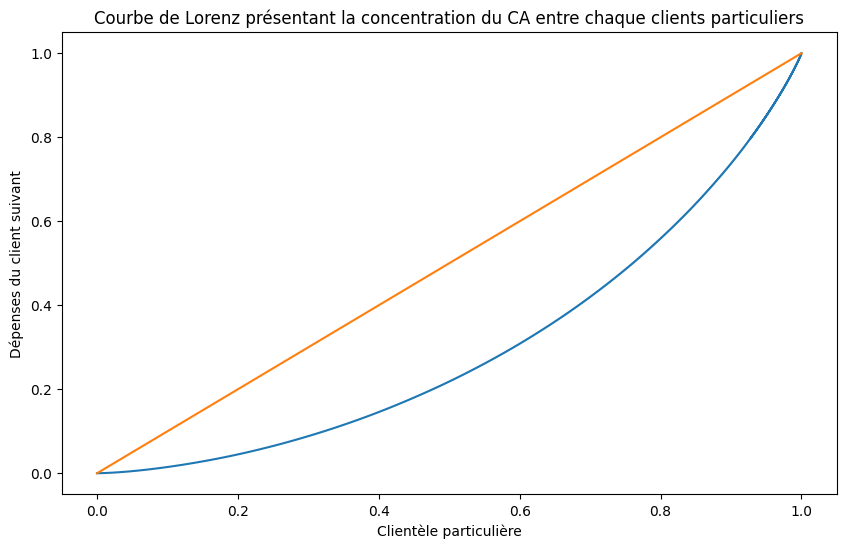

In [70]:
df_lorenz = df_particulier.groupby('client_id').agg({'price':'sum'}).reset_index()
df_lorenz = df_lorenz.rename(columns={'price':'Montant total des achats'})


Achats = df_lorenz['Montant total des achats'].values
n = len(Achats)
lorenz = np.cumsum(np.sort(Achats)) / Achats.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.figure(figsize=(10, 6))
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1],linestyle='-')
plt.xlabel('Clientèle particulière')
plt.ylabel('Dépenses du client suivant')
plt.title('Courbe de Lorenz présentant la concentration du CA entre chaque clients particuliers')
plt.show()

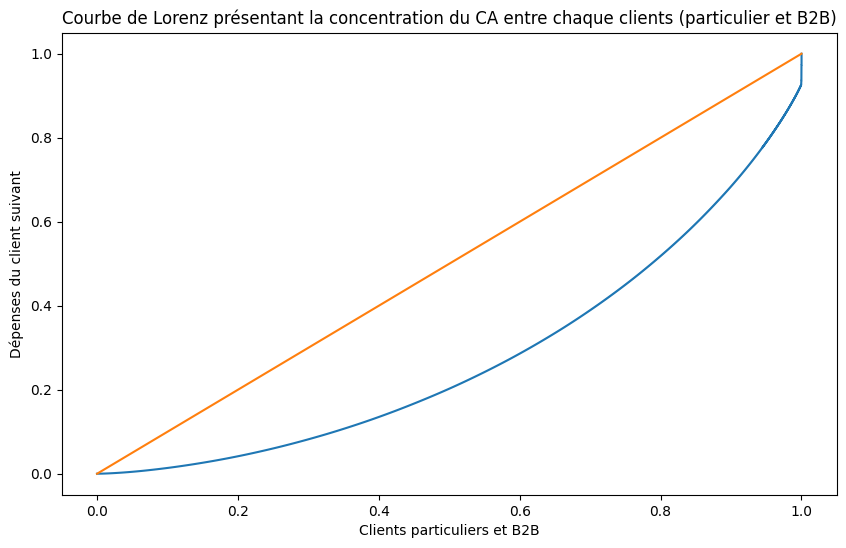

In [71]:
# Création de la courbe de Lorenz avec les clients particuliers et les clients B2B

df_lorenz = df.groupby('client_id').agg({'price':'sum'}).reset_index()
df_lorenz = df_lorenz.rename(columns={'price':'Montant total des achats'})

Achats = df_lorenz['Montant total des achats'].values
n = len(Achats)
lorenz = np.cumsum(np.sort(Achats)) / Achats.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.figure(figsize=(10, 6))
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1],linestyle='-')
plt.xlabel('Clients particuliers et B2B')
plt.ylabel('Dépenses du client suivant')
plt.title('Courbe de Lorenz présentant la concentration du CA entre chaque clients (particulier et B2B)')
plt.show()

In [ ]:
# On observe sur la seconde courbe un effet Pareto => On a l'impression que la courbe ne rejoint
# pas naturellement la droite orange.

# Cela s'explique par le fait que les 4 derniers clients (B2B) ont des montants d'achat beaucoup plus important que le reste des clients (particulier)